$$
\newcommand{proof}{\textbf{Proof: }}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from module import wave, signal, fourier
from module.utility import spectrum_line

# Fourier series

## Preamble

For any 2-dimensional coordinates, recall that we can represent as $(x,y)$ Cartesian coordinate pair, or as $(r, \theta)$ polar coordinate.

In the [introduction](./introduction.ipynb), we learnt about signals, and how to represent them as value-over-time.

Now, we will introduce another way of representing our signal.

## Spectrum

We can represent a signal as a frequency-domain representation, this is called a **spectrum**.

This representation contains of 2 components, a **magnitude spectrum** and a **phase spectrum**.

The magnitude/phase spectrum tells us the magnitude/phase of each frequency in the signal respectively.

### SInusoid

Consider a sinusoid of the formula:
$$
x(t) =
\mu e^{j(2\pi f_0t + \phi)}
= \mu e^{j\phi}e^{j(2\pi f_0t)}
$$

In the **spectral plots**, the spectrum would look like below:

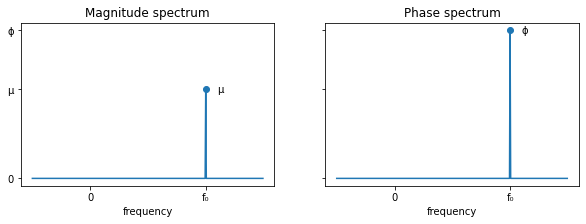

In [2]:
mu, phi, f = 3, 5, 2

fs = np.linspace(-5, 5, 1000)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True, sharex=True)

axs[0].plot(*spectrum_line([f], [mu]))
axs[0].scatter([f], [mu])
axs[1].scatter([f], [phi])
axs[0].set_xlabel("frequency")

axs[1].plot(*spectrum_line([f], [phi]))
axs[1].set_xlabel("frequency")

axs[0].set_xticks([0, f])
axs[0].set_xticklabels([0, "f₀"])

axs[0].set_yticks([0, mu, phi])
axs[0].set_yticklabels([0, "μ", "ɸ"])

axs[0].annotate("μ", (2.2, 2.9))
axs[1].annotate("ɸ", (2.2, 4.9))


axs[0].set_title("Magnitude spectrum")
axs[1].set_title("Phase spectrum")

plt.show()

Remember that we have the following identity for sine and cosine signals.

$$
\mu \cos (\omega_0 t + \phi) = \frac{\mu}{2} \left( e^{j(\omega_0 t + \phi)} + e^{-j(\omega_0 t + \phi)} \right) \\
\mu \sin (\omega_0 t + \phi) = \frac{\mu}{j2} \left( e^{j(\omega_0 t + \phi)} - e^{-j(\omega_0 t + \phi)} \right) \\
$$

Therefore, the spectrum plot of the cosine signal is just the sum of the two complex sinusoid spectrum.

$$
\mu \cos (\omega_0 t + \phi) = \frac{\mu}{2} \left( e^{j(\omega_0 t + \phi)} + e^{-j(\omega_0 t + \phi)} \right) \\
= \frac{\mu}{2} \left( e^{j(\omega_0 t + \phi)}\right) + \frac{\mu}{2}\left(e^{j(-\omega_0 t - \phi)} \right) 
$$

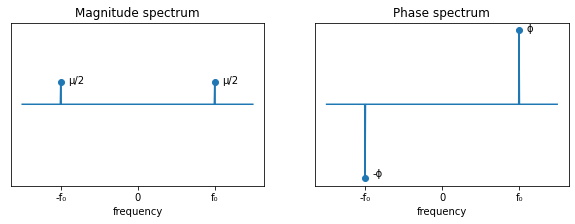

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True, sharex=True)

axs[0].plot(*spectrum_line([-f, f], [mu/2, mu/2]))
axs[0].scatter([-f, f], [mu/2, mu/2])
axs[1].scatter([-f, f], [-phi, phi])
axs[0].set_xlabel("frequency")

axs[1].plot(*spectrum_line([-f, f], [-phi, phi]))
axs[1].set_xlabel("frequency")

axs[0].set_xticks([-f, 0, f])
axs[0].set_xticklabels(["-f₀", 0, "f₀"])

axs[0].set_yticks([])

axs[0].annotate("μ/2", (2.2, 1.4))
axs[0].annotate("μ/2", (-1.8, 1.4))
axs[1].annotate("ɸ", (2.2, 4.9))
axs[1].annotate("-ɸ", (-1.8, -4.9))


axs[0].set_title("Magnitude spectrum")
axs[1].set_title("Phase spectrum")

plt.show()

Similarly, for the sine signal:

$$
\begin{align}
\mu \sin (\omega_0 t + \phi) &= \frac{\mu}{j2} \left( e^{j(\omega_0 t + \phi)} - e^{-j(\omega_0 t + \phi)} \right) \\
&= \frac{\mu}{j2} \left( e^{j(\omega_0 t + \phi)} \right) + \frac{-\mu}{j2}\left(e^{j(-\omega_0 t - \phi)} \right) \\
&= \frac{\mu}{2} \left( e^{j(\omega_0 t + \phi - \frac{\pi}{2})} \right) + \frac{-\mu}{j2}\left(e^{j(-\omega_0 t - \phi)} \right), \qquad j = e^{j\frac{\pi}{2}}\\
&= \frac{\mu}{2} \left( e^{j(\omega_0 t + \phi - \frac{\pi}{2})} \right) + \frac{\mu}{2}\left(e^{j(-\omega_0 t - \phi + \frac{\pi}{2})} \right)\\
\end{align}
$$

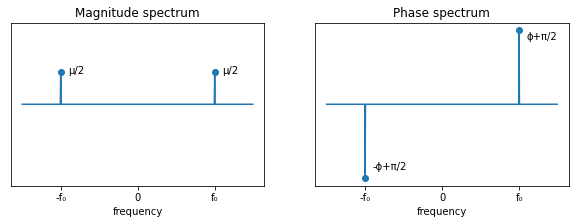

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True, sharex=True)

axs[0].plot(*spectrum_line([-f, f], [mu/2, mu/2]))
axs[0].scatter([-f, f], [mu/2, mu/2])
axs[1].scatter([-f, f], [-phi + np.pi/2, phi - np.pi/2])
axs[0].set_xlabel("frequency")

axs[1].plot(*spectrum_line([-f, f], [-phi + np.pi/2, phi - np.pi/2]))
axs[1].set_xlabel("frequency")

axs[0].set_xticks([-f, 0, f])
axs[0].set_xticklabels(["-f₀", 0, "f₀"])

axs[0].set_yticks([])

axs[0].annotate("μ/2", (2.2, 1.4))
axs[0].annotate("μ/2", (-1.8, 1.4))
axs[1].annotate("ɸ+π/2", (2.2, 3))
axs[1].annotate("-ɸ+π/2", (-1.8, -3))


axs[0].set_title("Magnitude spectrum")
axs[1].set_title("Phase spectrum")

plt.show()

As we can see, the sine and cosine signals have very similar spectrum.
It also follows our understanding that cosine and sine signals are the "same" signal, just at a different phase.

## Phasors

In our spectrum plot, we have negative frequencies.
It may seem rather odd, but it becomes apparent once we rationalize it in the form of a phasor.

Imagine point on a circle rotating counter-clockwise.
This is a phasor with a positive frequency.
It has the formula of
$$
\mu e^{j(2 \pi f_0 t + \theta)}
$$

We also know that its real/imaginary components are $\mu\cos(2\pi f_0 t + \theta)$ and $\mu \sin (2\pi f_0 t +\theta)$ respectively.
Notice that this is the same as projecting the circle unto the real/imaginary axis, by tracking the $x$ coordinate and $y$ coordinate of the point on the circle respectively.

Therefore, a phasor with negative frequency is simply a phasor that is rotating in the other direction.

## Fourier series

We've establish our plots for an ideal sinusoid.
Now we wish to extend this plot for any periodic signal.
We can derive their spectra by finding their **Fourier series**.

The Fourier series represents any periodic signal as a sum of (possibly infinite) sinusoidal waves.

### Complex Fourier series

For any periodic signal $x_(t)$, we wish to find the following representation (where it is a sum of sinusoids of different frequencies):
$$
x(t) = \sum _{k=-\infty} ^{\infty} c_k e^{j2\pi \frac{k}{T_P}t} = \sum _{k=-\infty} ^{\infty} c_k e ^{j2\pi kf_pt}
$$

where $T_p$ is the fundamental period for the signal.
We use the symbol $T_p$ because $T$ is reserved as parameter for signals, _eg_ $rect(T)$.

$kf_p$ the $k$-th harmonic of fundamental frequency $f_p$.
An harmonic is simply a frequency is a multiple of $f_p$ and has non-zero magnitude for its sinusoid.

What we desire is $c_k$, the **Fourier series coefficients** of $x(t)$.

We will now proceed to derive $c_m$ (for a specific $k=m$).

Firstly, we multiply both sides by $e^{-j2\pi m \frac{t}{T_p}}$

$$
\begin{align}
e^{-j2\pi m \frac{t}{T_p}} x(t) &= e^{-j2\pi m \frac{t}{T_p}} \sum _{k=-\infty} ^{\infty} c_k e^{j2\pi \frac{k}{T_p}t}\\
&= \sum _{k=-\infty} ^{\infty} c_k e^{j2\pi \frac{m-k}{T_p}t}
\end{align}
$$

Now we integrate both sides over 1 period.

$$
\int_{t_0} ^{t_0 + T_p} e^{-j2\pi m \frac{t}{T_p}} x(t) dt =\int_{t_0} ^{t_0 + T_p}  \sum _{k=-\infty} ^{\infty} c_k e^{j2\pi \frac{m-k}{T_p}t} dt
=\sum _{k=-\infty} ^{\infty} \left(c_k \int_{t_0} ^{t_0 + T_p}  e^{j2\pi \frac{m-k}{T_p}t}dt \right)
$$

Now, we examine the $ e^{j2\pi \frac{m-k}{T_p}t}$ term.

For all $k \in \mathbb Z, k \neq m$, this term is simply a sinusoid.
Since we are integrating over 1 fundamental period, the integral is $0$, since the integral of a sinusoid over an integer number of periods is $0$.

Therefore, the only non-zero term corresponds to the $c_m$ term.

And when $k=m$, we get $e ^ 0 = 1$ as the inner term.
Hence, the integral is simply equals to $\int _{t_0} ^{t_0 + T_p} 1 dt = T_p$.

Therefore, we can simply it to:

$$
\int_{t_0} ^{t_0 + T_p} e^{-j2\pi m \frac{t}{T_p}} x(t) dt 
=c_m T_p
$$

Lastly, rearranging the terms, we get:

$$
c_m = \frac{1}{T_p} \int_{t_0} ^{t_0 + T_p} e^{-j2\pi m \frac{t}{T_p}} x(t) dt 
$$

Hence, we can find all the coefficients for the complex Fourier series.

### Trigonometric Fourier series

### Complex Fourier series

Similarly, we can compose the signal using purely sine and cosines instead.

$$
\begin{align}
x(t) &= \sum _{k=\infty} ^{\infty} c_k e^{j2\pi \frac{k}{T_p}t}  \\
&= \sum _{k=\infty} ^{-1} c_k e^{j2\pi \frac{k}{T_p}t}  
+ c_0 + \sum _{k=1} ^{\infty} c_k e^{j2\pi \frac{k}{T_p}t}  \\
&= c_0 + \sum _{k=1} ^{\infty} \left(c_k e^{j2\pi \frac{k}{T_p}t} + c_{-k} e^{j2\pi \frac{-k}{T_p}t} \right)\\
&= c_0 + \sum _{k=1} ^{\infty} \left((c_k + c_{-k})\cos(2\pi k \frac{t}{T_p}) + j(c_k - c_{-k}) \sin(2\pi k \frac{t}{T_p})\right), \qquad \text{expand exponentials and simplify}\\
\end{align}
$$

Hence, the real coefficients $a_k$ are:
$$
a_k = \frac{c_{-k} + c_k}{2}, \quad k \geq 0
$$

(Convince yourselves that this also works for $k = 0$, where $c_0 = a_0$)

And the imaginary coefficients $b_k$ are:
$$
b_k = \frac{c_{-k} - c_k}{j2}, \quad k > 0
$$

(In fact, many of the signals we examine would have $c_k = -c_k$ (_ie_, the spectrum is symmetrical about $0$), and hence have no imaginary components)

## Fourier series of common signals

### Square wave

A square wave is as per below:

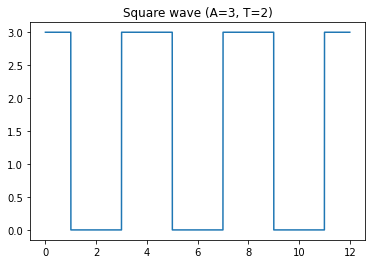

In [5]:
A, T = 3, 2
Tp = 2 * T
ts = np.linspace(0, 6 * T, 10000)
xs = wave.square(ts, T, A)

plt.plot(ts, xs)
plt.title('Square wave (A=3, T=2)')
plt.show()

It is simply a [$rect$](./introduction.ipynb#Rectangle) signal that repeats every $2T$ interval, and a height of $A$.

#### Fourier series

The Fourier series is simply $c_k = \frac{A}{2} sinc \left(\frac{k}{2} \right)$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        $$\begin{align}c_k &= \frac{A}{2T} \int _{-0.5T} ^ {1.5T} e^{-j 2 \pi (\frac{kt}{2T})} dt\\
        &= \frac{A}{2T} \int _{-0.5T} ^ {0.5T} e^{-j  \pi (\frac{kt}{T})} dt\\
        &= \frac{A}{2T} \left[ \frac{e^{-j  \pi (\frac{kt}{T})}} {-j \pi \frac{k}{T}} \right]^{0.5T}_{-0.5T} \\
        &= \frac{A}{2T} \left( \frac{e^{-j  \pi (\frac{k}{2})}} {-j \pi \frac{k}{T}}  - \frac{e^{-j  \pi (\frac{-k}{2})}} {-j \pi \frac{k}{T}} \right) \\
        &= \frac{A}{2T} \left( \frac{e^{j  \pi (\frac{k}{2})}} {j \pi \frac{k}{T}}  - \frac{e^{j  \pi (\frac{-k}{2})}} {j \pi \frac{k}{T}} \right) \\
        &= \frac{A}{2} \left( \frac{e^{j  \pi (\frac{k}{2})}} {j \pi k}  - \frac{e^{j  \pi (\frac{-k}{2})}} {j \pi k} \right) \\
        &= \frac{A}{2} \left( \frac{\sin\left(\frac{\pi k}{2} \right)}{\frac{\pi k}{2}} \right) \\
        &= \frac{A}{2} sinc \left( \frac{k}{2} \right)
        \end{align}$$
    </div>
</details>

Note that this series is infinite.
(In fact, most Fourier series are infinite)

#### Visualization

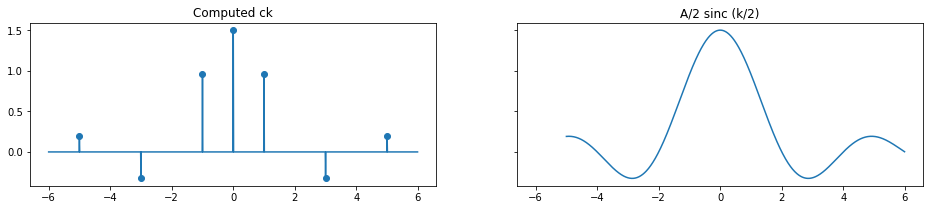

In [6]:
c_range = np.arange(-5, 6)
cs = fourier.series(lambda t: wave.square(t, T, A), Tp, c_range)
indices = ~np.isclose(cs, 0, atol=1e-2)


_, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 3))

axs[0].scatter(c_range[indices], cs[indices])
axs[0].plot(*spectrum_line(c_range, cs))
axs[0].set_title('Computed ck')
axs[1].plot(np.arange(-5, 6, 1e-2), A/2*signal.sinc(np.arange(-5, 6, 1e-2), 2))

axs[1].set_title('A/2 sinc (k/2)')
plt.show()

#### Reconstruction

To reconstruct the waveform from its Fourier series, we simply add up the sinusoid multiplied by the respective coefficients.

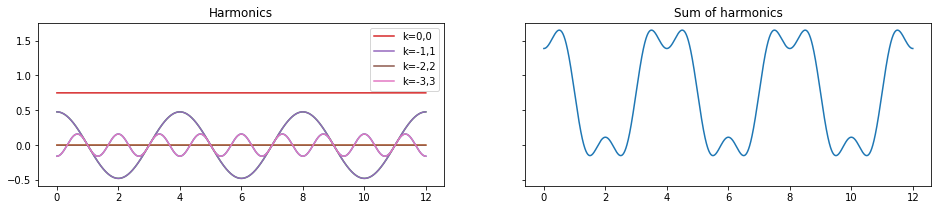

In [7]:
span = 3
ks = np.arange(-span, span + 1)
harmonics = np.array([A / 2 * signal.sinc(k, 2) *
                     signal.sinusoid(ts, f=k / Tp).real for k in ks])

_, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 3))

for k, h in zip(ks, harmonics):
    axs[0].plot(ts, h, label=f'k={-k},{k}' if k >= 0 else "")

axs[0].legend(loc='upper right')
axs[0].set_title('Harmonics')
axs[1].plot(ts, harmonics.sum(axis=0))
axs[1].set_title('Sum of harmonics')
plt.show()

In [8]:
def c_func(k):
    return A / 2 * signal.sinc(k, 2)

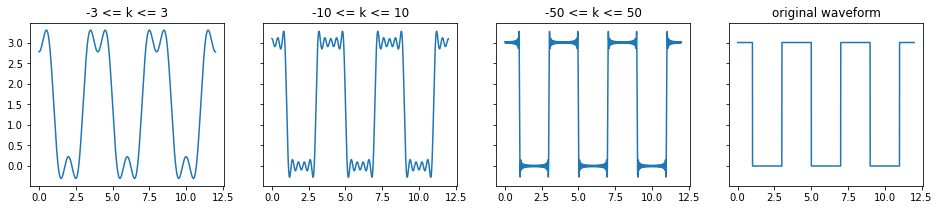

In [9]:
_, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16, 3))
axs[-1].plot(ts, xs)
axs[-1].set_title('original waveform')

axs[0].plot(ts, fourier.reconstruct(3, c_func, ts, Tp))
axs[0].set_title('-3 <= k <= 3')
axs[1].plot(ts, fourier.reconstruct(10, c_func, ts, Tp))
axs[1].set_title('-10 <= k <= 10')
axs[2].plot(ts, fourier.reconstruct(50, c_func, ts, Tp))
axs[2].set_title('-50 <= k <= 50')
plt.show()

As we can see, by increasing the number of harmonics, we get a better approximation of the square wave.

(For those curious, that the "spikes" you see at the boundary of the square waves is due to the [Gibbs phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon))

### Triangle wave

A triangle wave is as per below:

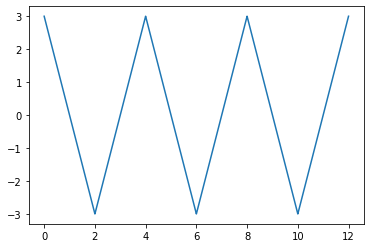

In [10]:
A, T = 3, 2
Tp = 2 * T
ts = np.linspace(0, 6 * T, 10000)


def tri(ts, T, A):
    factor = np.floor((ts + T/2)/T)
    xs = ts - T * factor
    return A * signal.tri(xs, T/2) * np.where(factor % 2 == 0, 1, -1)


xs = tri(ts, T, A)

plt.plot(ts, xs)
plt.show()

Similar to the square wave, but instead the triangle signal is used.

#### Fourier series

$$
\begin{align}
c_k = \begin{cases} 
0 \quad &k = 0, \pm 2, \pm 4, \dots \\
4A \left(\frac{j}{\pi k} + \frac{1}{\pi^2k^2} \right) \quad &k = \pm 1, \pm 3, \dots
 \end{cases}
\end{align}
$$

Since we are interested in the real part of the signal, we can drop the imaginary term.

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$\begin{align}
\text{When $k = 0$,} \quad
c_k &= \frac{A}{2T} \int _{-T} ^ {T} x(t)  dt = 0 \\
\text{otherwise} \quad
c_k &= \frac{A}{2T} \int _{-T} ^ {T} x(t) e^{-j 2 \pi (\frac{kt}{2T})} dt\\
&= \frac{A}{2T} \left( \int _{-T} ^ {0} x(t) e^{-j \pi (\frac{kt}{T})}dt+
\int _{0} ^ {T} x(t) e^{-j \pi (\frac{kt}{T})} dt\right)\\
&= \frac{A}{2T} \left( \int _{-T} ^ {0} (1 + \frac{2t}{T}) e^{-j \pi (\frac{kt}{T})} dt+
\int _{0} ^ {T} (1 - \frac{2t}{T}) e^{-j  \pi (\frac{kt}{T})}dt \right) \\
&= \frac{A}{2T} \left( \int _{-T} ^ {T} e^{-j \pi (\frac{kt}{T})} dt - 
2\int _{0} ^ {T} (\frac{2t}{T}) e^{-j \pi (\frac{kt}{T})}dt \right) \\
&= \frac{A}{2T} \left( \int _{-T} ^ {T} e^{-j \pi (\frac{kt}{T})} dt -\frac{4}{T} 
 \left[\frac{t e^{-j \pi (\frac{kt}{T})}  - e^{-j \pi (\frac{kt}{T}) }}{-j \pi (\frac{k}{T})}\right] _{0} ^ {T}\right) \\
&= \frac{A}{2T} \left( \int _{-T} ^ {T} e^{-j \pi (\frac{kt}{T})} dt -\frac{4}{T} 
 \left[\frac{e^{-j \pi \frac{kt}{T}} (t - \frac{1}{-j \pi \frac{k}{T}})}{-j \pi \frac{k}{T}}\right] _{0} ^ {T}\right) \\
&= \frac{A}{2T} \left( T sinc (k)- \frac{4}{T} 
 \frac{e^{-j \pi k} (T - \frac{1}{-j \pi \frac{k}{T}}) + \frac{1}{-j \pi \frac{k}{T}}}{-j \pi \frac{k}{T}}\right) \\
&= \frac{A}{2T} \left( - \frac{4}{T} 
 \frac{e^{-j \pi k} (T - \frac{1}{-j \pi \frac{k}{T}}) + \frac{1}{-j \pi \frac{k}{T}}}{-j \pi \frac{k}{T}}\right) \\
&= \begin{cases} 
0 \quad &k = 0, \pm 2, \pm 4, \dots \\
4A \left(\frac{j}{\pi k} + \frac{1}{\pi^2k^2} \right) \quad &k = \pm 1, \pm 3, \dots
 \end{cases}
\end{align}$$
    </div>
</details>

#### Visualization

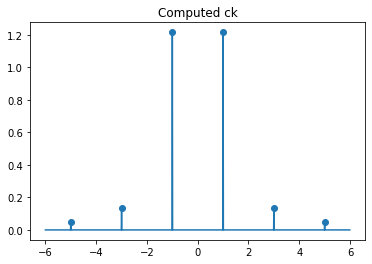

In [11]:
c_range = np.arange(-5, 6)
cs = fourier.series(lambda t: tri(t, T, A), Tp, c_range)
indices = ~np.isclose(cs, 0, atol=1e-2)

plt.scatter(c_range[indices], cs[indices])
plt.plot(*spectrum_line(c_range, cs))
plt.title('Computed ck')

plt.show()

#### Reconstruction

To reconstruct the waveform from its Fourier series, we simply add up the sinusoid multiplied by the respective coefficients.

In [12]:
def c_func(k):
    if k % 2 == 0:
        return 0
    return 4 * A / (np.pi * k) ** 2

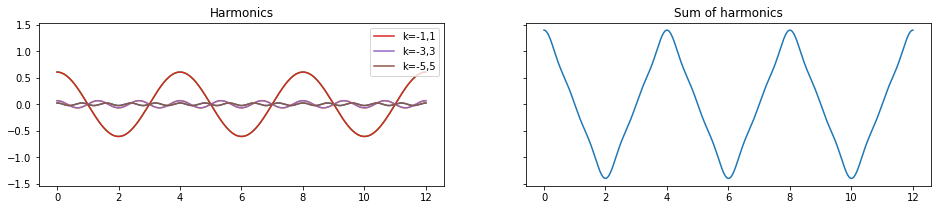

In [13]:
span = 5
ks = np.arange(-span, span + 1, 2)
harmonics = np.array([c_func(k) *
                     signal.sinusoid(ts, f=k / Tp).real for k in ks])

_, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 3))

for k, h in zip(ks, harmonics):
    axs[0].plot(ts, h, label=f'k={-k},{k}' if k >= 0 else "")

axs[0].legend(loc='upper right')
axs[0].set_title('Harmonics')
axs[1].plot(ts, harmonics.sum(axis=0))
axs[1].set_title('Sum of harmonics')
plt.show()

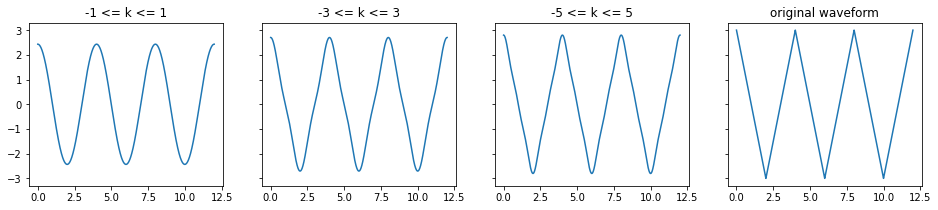

In [14]:
_, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16, 3))
axs[-1].plot(ts, xs)
axs[-1].set_title('original waveform')

axs[0].plot(ts, fourier.reconstruct(1, c_func, ts, Tp))
axs[0].set_title('-1 <= k <= 1')
axs[1].plot(ts, fourier.reconstruct(3, c_func, ts, Tp))
axs[1].set_title('-3 <= k <= 3')
axs[2].plot(ts, fourier.reconstruct(5, c_func, ts, Tp))
axs[2].set_title('-5 <= k <= 5')
plt.show()

The Fourier approximation of the triangle wave converges to the actual waveform faster than square wave.